In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



import ensembles
import importlib
importlib.reload(ensembles) #this is for notebooks - otherwise I have to restart the kernel every time I change anything


import networks
importlib.reload(networks) #this is for notebooks - otherwise I have to restart the kernel every time I change anything


import tensorflow as tf


import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

In [2]:
num_epochs = 2500
num_eps = 75#25#75
#seed = 43#43 is cool 101 1011
from global_vars import SEED as seed

params = {'num_neurons':[10,15,5],
          'num_epochs':num_epochs,
          'learning_rate':0.1,
          'seed':seed,
         'optimizer':tf.train.AdamOptimizer,
         #'initialisation_scheme':tf.truncated_normal
         }




ensemble = [{'num_neurons':[10,10,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,5,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,5,20],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10,10,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10,5],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10],'num_epochs':num_epochs}]#,'optimizer':tf.train.AdamOptimizer}]
        

    
bootstrap_ensemble_stats = {'num_neurons':[10,15,5],'num_epochs':num_epochs,'optimizer':tf.train.AdamOptimizer,
         'initialisation_scheme':tf.truncated_normal}


In [3]:
# Create a random dataset
rng = np.random.RandomState(seed)
X_train = np.sort(9 * rng.rand(100, 1), axis=0)
y_train =  np.sin(X_train).ravel()*10 + np.random.normal(0,3,size=X_train.shape[0])

# Predict
X_test = np.arange(-1.0, 12, 0.1)[:, np.newaxis] 
y_test =  np.sin(X_test).ravel()*10 + np.random.normal(0,3,size=X_test.shape[0])


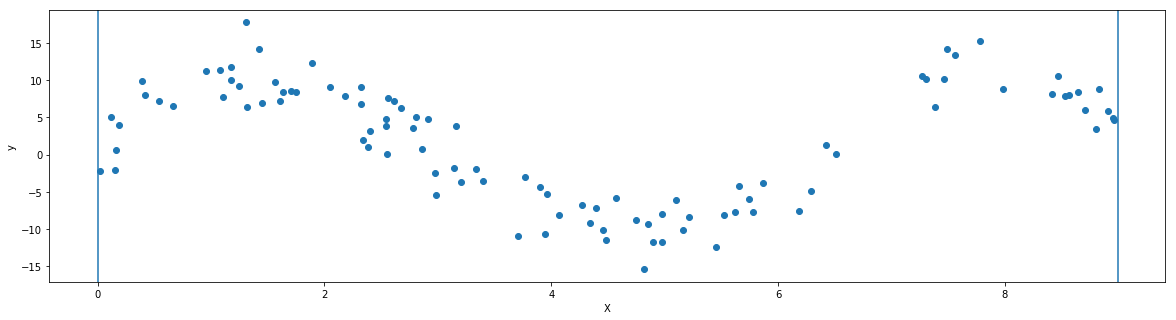

In [4]:
plt.scatter(X_train,y_train)
plt.xlabel('X')
plt.ylabel('y')
#plt.savefig('nonlinearDataset.png')
plt.axvline(x=9)
plt.axvline(x=0)


(130,)
(130, 1)


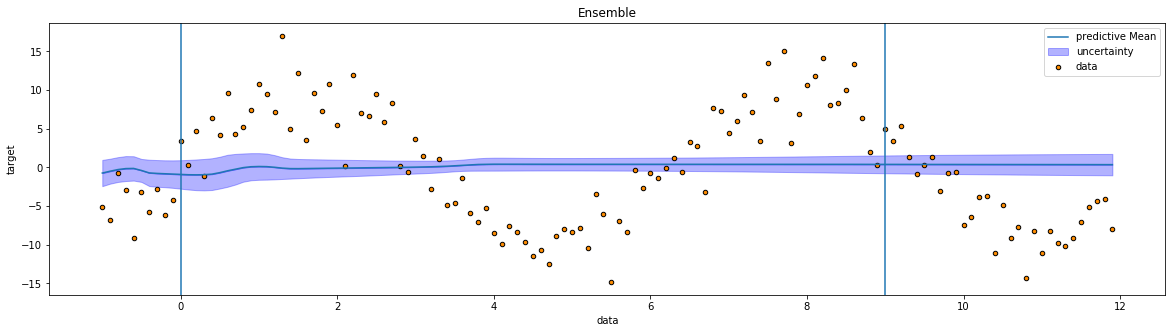

In [5]:
vanialla_ensemble = ensembles.VanillaEnsemble(estimator_stats = ensemble)
plot = vanialla_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))
plot.axes[0].axvline(x=9)
plot.axes[0].axvline(x=0)

(130,)
(130, 1)


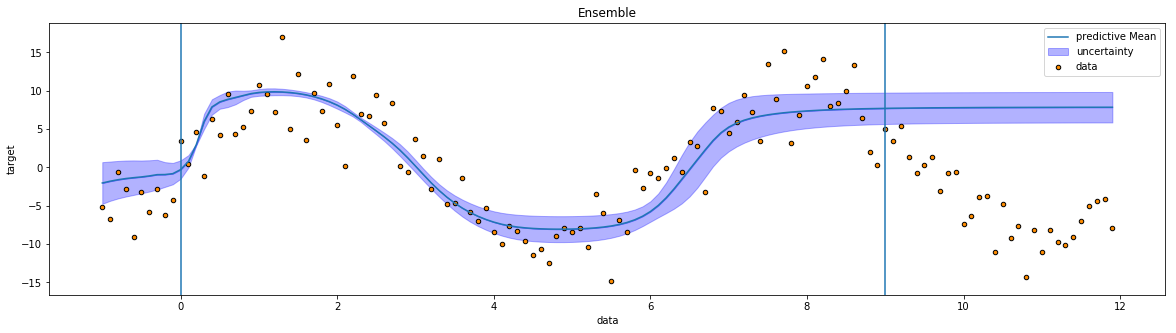

In [6]:
vanialla_ensemble.fit(X_train,y_train)
plot = vanialla_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))
plot.axes[0].axvline(x=9)
plot.axes[0].axvline(x=0)

(130,)
(130, 1)


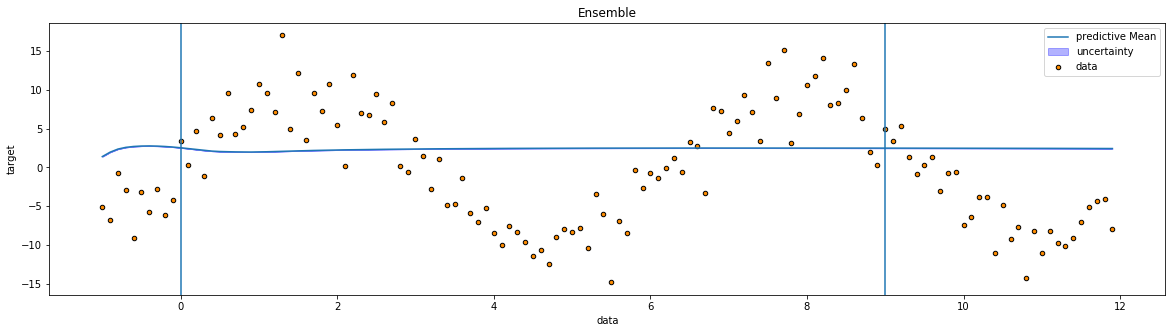

In [7]:
bootstrap_ensemble = ensembles.BootstrapEnsemble(estimator_stats = bootstrap_ensemble_stats)
plot = bootstrap_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))
plot.axes[0].axvline(x=9)
plot.axes[0].axvline(x=0)

(130,)
(130, 1)


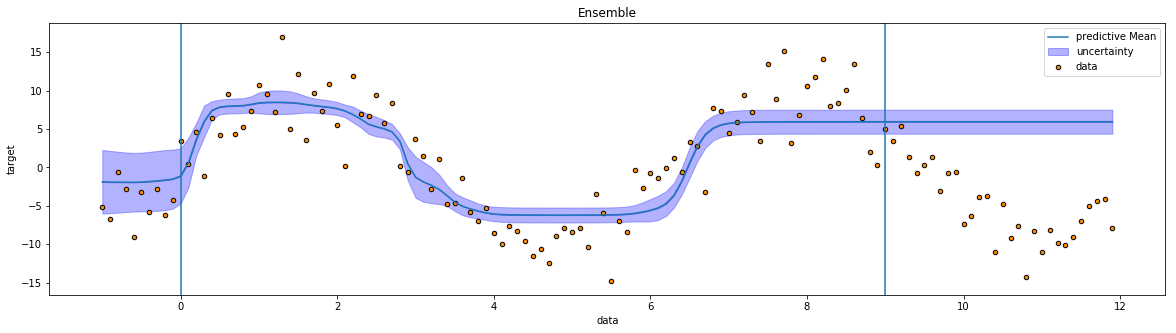

In [8]:
bootstrap_ensemble.fit(X_train,y_train)
plot = bootstrap_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))
plot.axes[0].axvline(x=9)
plot.axes[0].axvline(x=0)

(130,)
(130, 1)


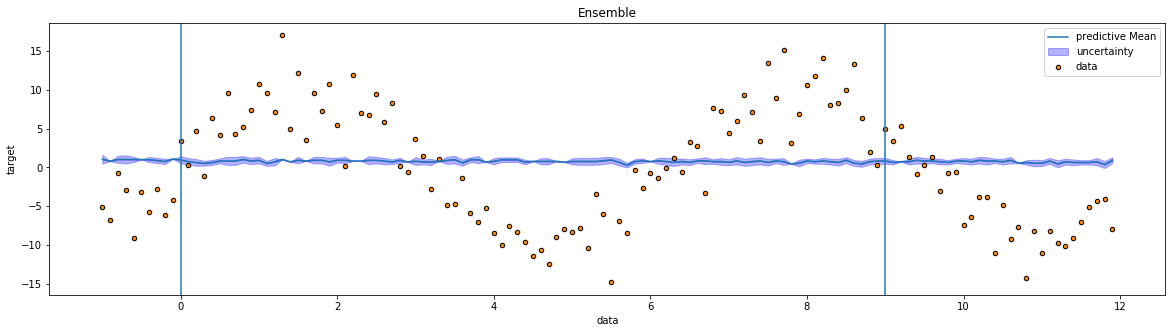

In [9]:
dropout_network = networks.DropoutNetwork(**params)
plot = dropout_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))
plot.axes[0].axvline(x=9)
plot.axes[0].axvline(x=0)

(130,)
(130, 1)


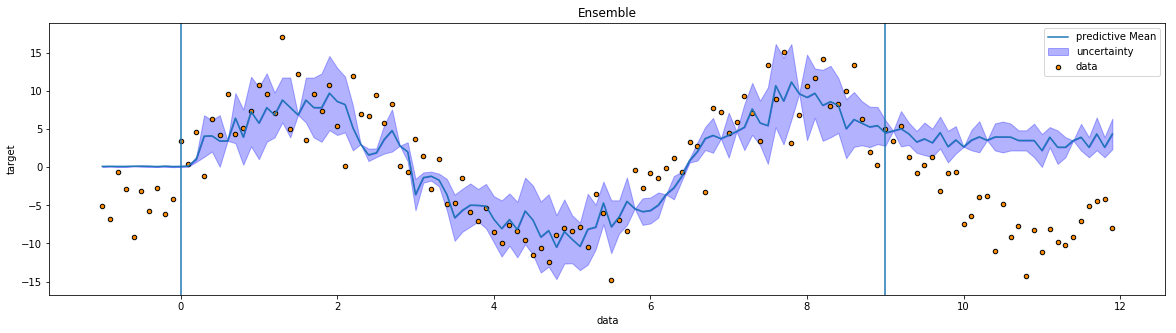

In [10]:
dropout_network.fit(X_train,y_train)
plot = dropout_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))
plot.axes[0].axvline(x=9)
plot.axes[0].axvline(x=0)

(130,)
(130, 1)


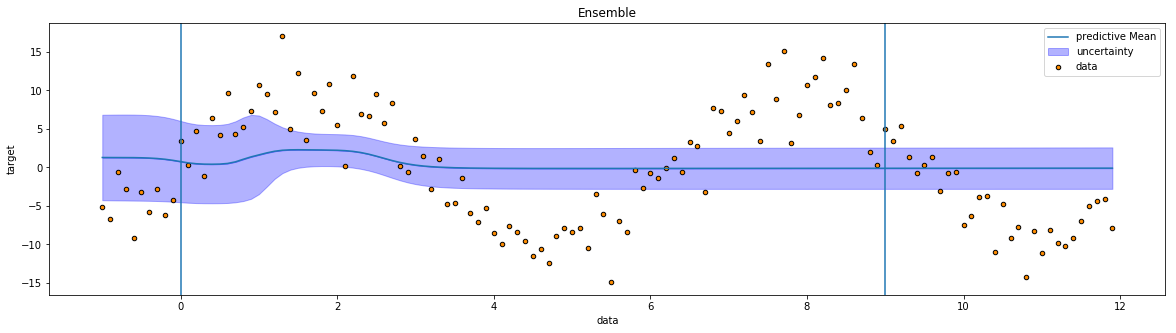

In [13]:
gl_network = networks.GaussianLossNetwork(**params)
plot = gl_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))
plot.axes[0].axvline(x=9)
plot.axes[0].axvline(x=0)

(130,)
(130, 1)


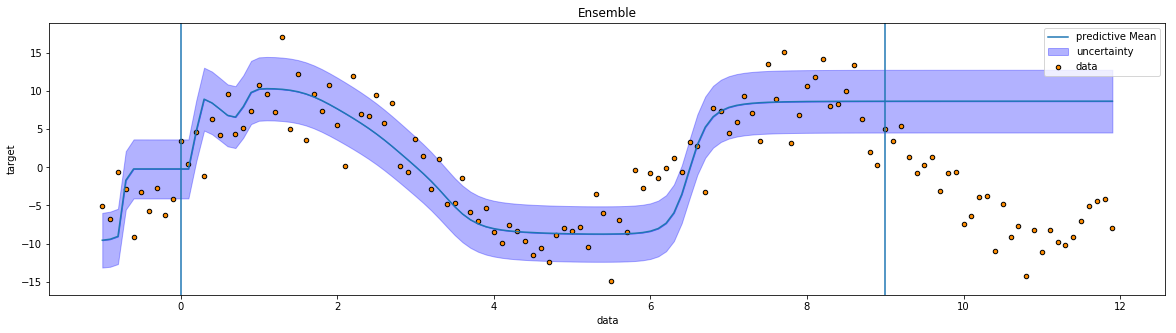

In [14]:
gl_network.fit(X_train,y_train,False)

plot = gl_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))
plot.axes[0].axvline(x=9)
plot.axes[0].axvline(x=0)
